# Keras Tutorial

## Import Utilities & Dependencies

- `print_function` works in Python 2 and Python 3
- Keras uses the NumPy mathematics library to manipulate arrays and matrices. Matplotlib is a plotting library for NumPy: you'll use it to inspect a training data item.
- Import Keras 2.0.6 and the components needed for the model. [FutureWarning due to NumPy 1.14](https://github.com/h5py/h5py/issues/961)
- Import coremltools

In [2]:
!pip install coremltools

from __future__ import print_function
from matplotlib import pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

import coremltools
# coremltools supports Keras version 2.0.6
print('keras version ', keras.__version__)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.1 MB/s eta 0:00:00


keras version  2.12.0


## Load and Pre-Process Data

### Training and Testing/Validation Sets

`mnist.load_data()` downloads from https://s3.amazonaws.com/img-datasets/mnist.npz — this takes a little while.

In [3]:
(x_train, y_train), (x_val, y_val) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


### Inspect x and y Data

x_train shape:  (60000, 28, 28)
60000 training samples
x_val shape:  (10000, 28, 28)
10000 validation samples
First x sample
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 2

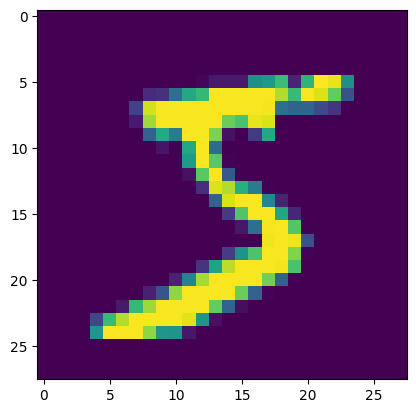

y_train shape:  (60000,)
First 10 y_train elements: [5 0 4 1 9 2 1 3 1 4]


In [4]:
# Inspect x data
print('x_train shape: ', x_train.shape)
# Displays (60000, 28, 28)
print(x_train.shape[0], 'training samples')
# Displays 60000 train samples
print('x_val shape: ', x_val.shape)
# Displays (10000, 28, 28)
print(x_val.shape[0], 'validation samples')
# Displays 10000 validation samples

print('First x sample\n', x_train[0])
# Displays an array of 28 arrays, each containing 28 gray-scale values between 0 and 255
# Plot first x sample
plt.imshow(x_train[0])
plt.show()

# Inspect y data
print('y_train shape: ', y_train.shape)
# Displays (60000,)
print('First 10 y_train elements:', y_train[:10])
# Displays [5 0 4 1 9 2 1 3 1 4]


### Set input and output dimensions

MNIST data items are 28 x 28-pixel images, and you want to classify each as a digit between 0 and 9.

`x_train.shape` is an array of 3 elements: number of data samples, number of rows of each data sample, number of columns of each data sample

In [5]:
img_rows, img_cols = x_train.shape[1], x_train.shape[2]
num_classes = 10


### Reshape x Data & Set Input Shape

- Insert the channels, either before or after the image's rows and columns. MNIST data samples are gray-scale, so the number of channels is 1.
- Set the input shape of the sample data, with the channels at the correct end.

In [6]:
# Set input_shape for channels_first or channels_last
if K.image_data_format() == 'channels_first':  
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_val = x_val.reshape(x_val.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:  
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


### Inspect Reshaped x Data

TensorFlow image data format is channels-last.

In [7]:
print('x_train shape:', x_train.shape)
# x_train shape: (60000, 28, 28, 1)
print('x_val shape:', x_val.shape)
# x_val shape: (10000, 28, 28, 1)
print('input_shape:', input_shape)
# input_shape: (28, 28, 1)


x_train shape: (60000, 28, 28, 1)
x_val shape: (10000, 28, 28, 1)
input_shape: (28, 28, 1)


### Convert Data Type And Normalize Values

MNIST image data values are of type `uint8`, in the range [0, 255], but Keras needs values of type `float32`, in the range [0, 1].

In [8]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255
x_val /= 255


### Inspect Normalized x Data

In [9]:
print('First x sample, normalized\n', x_train[0])
# An array of 28 arrays, each containing 28 arrays, each with one value between 0 and 1


First x sample, normalized
 [[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.   

### Reformat y Data

`y_train` is a 1-dimensional array with 60000 elements, but the model needs a 60000 x 10 matrix to represent the 10 categories.

**Note:** Run this cell **once only**! Running it again will produce incorrect results.

In [10]:
print('y_train shape: ', y_train.shape)
# (60000,)
print('First 10 y_train elements:', y_train[:10])
# [5 0 4 1 9 2 1 3 1 4]
# Convert 1-dimensional class arrays to 10-dimensional class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)
print('New y_train shape: ', y_train.shape)
# (60000, 10)


y_train shape:  (60000,)
First 10 y_train elements: [5 0 4 1 9 2 1 3 1 4]
New y_train shape:  (60000, 10)


### Inspect Reformatted y Data

`y_train` is now an array of 10-element arrays, each containing all zeros except at the index that the image matches.

In [11]:
print('New y_train shape: ', y_train.shape)
# (60000, 10)
print('First 10 y_train elements, reshaped:\n', y_train[:10])
# An array of 10 arrays, each with 10 elements, 
# all zeros except at index 5, 0, 4, 1, 9 etc.


New y_train shape:  (60000, 10)
First 10 y_train elements, reshaped:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Define  model architecture

### [Malireddi's Architecture](https://sriraghu.com/2017/07/06/computer-vision-in-ios-coremlkerasmnist/)

In [12]:
model_m = Sequential()
model_m.add(Conv2D(32, (5, 5), input_shape=input_shape, activation='relu'))
model_m.add(MaxPooling2D(pool_size=(2, 2)))
model_m.add(Dropout(0.5))
model_m.add(Conv2D(64, (3, 3), activation='relu'))
model_m.add(MaxPooling2D(pool_size=(2, 2)))
model_m.add(Dropout(0.2))
model_m.add(Conv2D(128, (1, 1), activation='relu'))
model_m.add(MaxPooling2D(pool_size=(2, 2)))
model_m.add(Dropout(0.2))
model_m.add(Flatten())
model_m.add(Dense(128, activation='relu'))
model_m.add(Dense(num_classes, activation='softmax'))
# Inspect model's layers, output shapes, number of trainable parameters
print(model_m.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

### [Chollet's Architecture](https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py)

In [13]:
model_c = Sequential()
model_c.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
# Note: hwchong, elitedatascience use 32 for second Conv2D
model_c.add(Conv2D(64, (3, 3), activation='relu'))
model_c.add(MaxPooling2D(pool_size=(2, 2)))
model_c.add(Dropout(0.25))
model_c.add(Flatten())
model_c.add(Dense(128, activation='relu'))
model_c.add(Dropout(0.5))
model_c.add(Dense(num_classes, activation='softmax'))
# Inspect model's layers, output shapes, number of trainable parameters
print(model_c.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

## Train the Model

### Define Callbacks List

In [14]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]


### Compile & Fit Model

- On a MacBook Pro, this step takes approximately 15 minutes. Reducing `batch_size` or increasing `epochs` will increase the run time.
- You can run this cell more than once, to improve the model's accuracy.
- To *manually* stop early, click the stop button in the toolbar.

In [15]:
model_m.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Hyper-parameters
batch_size = 200
epochs = 10

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
history = model_m.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs,
    callbacks=callbacks_list, validation_data=(x_val, y_val), verbose=1)

# Save the model to an .h5 file
model_m.save('my_model.h5')


Epoch 1/10
300/300 [==============================] - 77s 249ms/step - loss: 0.6236 - accuracy: 0.7926 - val_loss: 0.1328 - val_accuracy: 0.9626
Epoch 2/10
300/300 [==============================] - 66s 221ms/step - loss: 0.1850 - accuracy: 0.9420 - val_loss: 0.0788 - val_accuracy: 0.9759
Epoch 3/10
300/300 [==============================] - 64s 214ms/step - loss: 0.1350 - accuracy: 0.9571 - val_loss: 0.0647 - val_accuracy: 0.9805
Epoch 4/10
300/300 [==============================] - 64s 211ms/step - loss: 0.1101 - accuracy: 0.9653 - val_loss: 0.0536 - val_accuracy: 0.9855
Epoch 5/10
300/300 [==============================] - 85s 282ms/step - loss: 0.0941 - accuracy: 0.9712 - val_loss: 0.0439 - val_accuracy: 0.9869
Epoch 6/10
300/300 [==============================] - 81s 270ms/step - loss: 0.0818 - accuracy: 0.9738 - val_loss: 0.0406 - val_accuracy: 0.9881
Epoch 7/10
300/300 [==============================] - 66s 221ms/step - loss: 0.0755 - accuracy: 0.9764 - val_loss: 0.0362 - val_ac

## Convert to Core ML Model

In [90]:
# For the first argument, use the filename of the newest .h5 file in the notebook folder.

import coremltools as ct
from keras.models import load_model

output_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# Add filename of the best model(the lowest validation loss)
model = load_model('best_model.10-0.03.h5')
classifier_config = ct.ClassifierConfig(output_labels)

# Convert the model
coreml_mnist = ct.convert(model,
           inputs=[coremltools.ImageType(name='conv2d_input')],
           classifier_config=classifier_config)


Translating MIL ==> NeuralNetwork Ops: 100%|██████████| 58/58 [00:00<00:00, 1745.06 ops/s]


### Inspect Core ML model

Check the input type is `imageType`, not multi array

In [91]:
print(coreml_mnist)


input {
  name: "conv2d_input"
  type {
    imageType {
      width: 28
      height: 28
      colorSpace: GRAYSCALE
      imageSizeRange {
        widthRange {
          lowerBound: 28
          upperBound: 28
        }
        heightRange {
          lowerBound: 28
          upperBound: 28
        }
      }
    }
  }
}
output {
  name: "Identity"
  type {
    dictionaryType {
      stringKeyType {
      }
    }
  }
}
output {
  name: "classLabel"
  type {
    stringType {
    }
  }
}
predictedFeatureName: "classLabel"
predictedProbabilitiesName: "Identity"
metadata {
  userDefined {
    key: "com.github.apple.coremltools.source"
    value: "tensorflow==2.12.0"
  }
  userDefined {
    key: "com.github.apple.coremltools.version"
    value: "6.3.0"
  }
}



### Add Metadata for Xcode

Substitute your own name and license info for the first two items

In [94]:
coreml_mnist.author = 'Ikmmal Azman'
coreml_mnist.license = 'MIT License'
coreml_mnist.short_description = 'Image based digit recognition (MNIST)'
coreml_mnist.version = '1'
coreml_mnist.input_description['conv2d_input'] = 'Digit image'
coreml_mnist.output_description['Identity'] = 'Probability of each digit'
coreml_mnist.output_description['classLabel'] = 'Labels of digits'

### Save the Core ML Model

In [96]:
coreml_mnist.save('MNISTClassifier.mlmodel')
